# Metoda konečných diferencí

### Semestrální práce KMA/SNM1

__Anežka Švandová, Jan Půlpán__

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from fdm import FDM

plt.rcParams['figure.figsize'] = [14, 7]

### Schéma centrální diference

Úloha:
$$-\,u''(x)+100\,u'(x)=x\mbox{, pro }x\in (0,1),$$
$$u(0)=u(1)=1.$$

Standardně používáme solver dsolve.

---------------------
 Krok sítě: h=0.1, tj. N =10


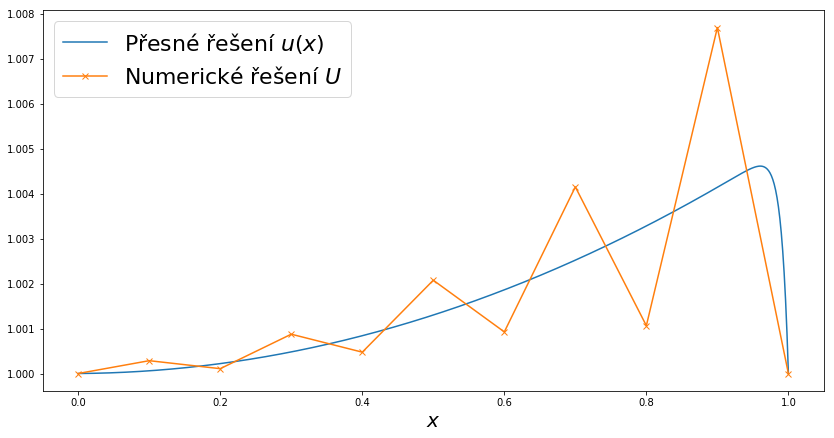

Solver Error dc: 2.2737367544323206e-13
E dc: 0.0035502358481294127
tau dc: 2.040046301621146
---------------------
 Krok sítě: h=0.05, tj. N =20


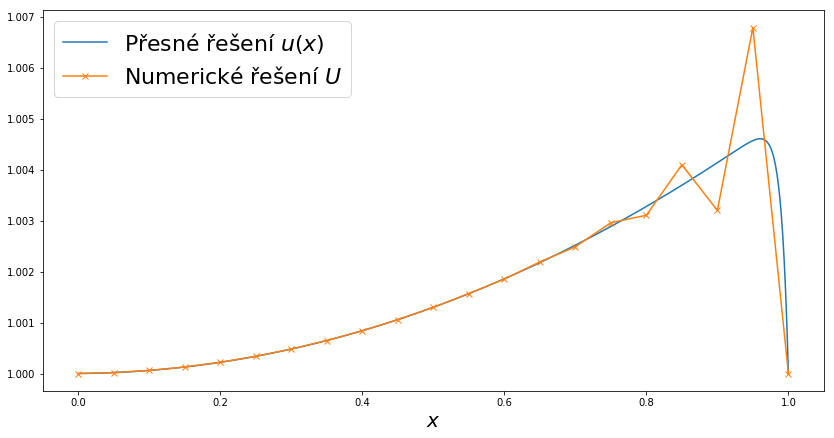

Solver Error dc: 3.865796571744795e-13
E dc: 0.002220078133782888
tau dc: 3.0871666682576233
---------------------
 Krok sítě: h=0.0333, tj. N =30


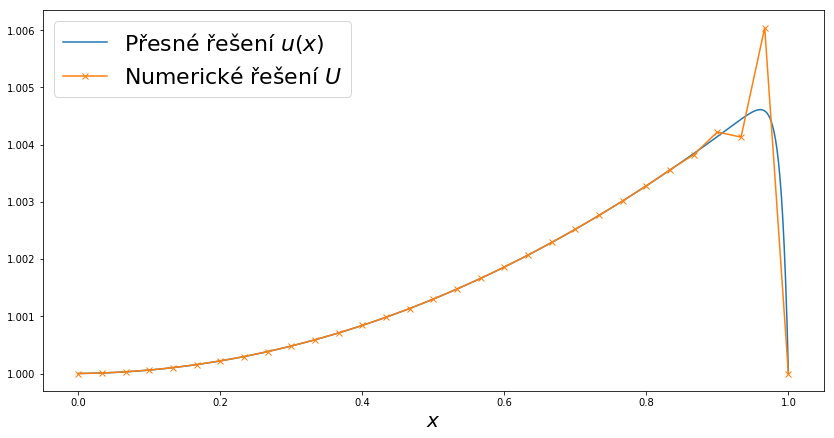

Solver Error dc: 7.048805983345119e-13
E dc: 0.0014569373660755502
tau dc: 3.371910221199869
---------------------
 Krok sítě: h=0.02, tj. N =50


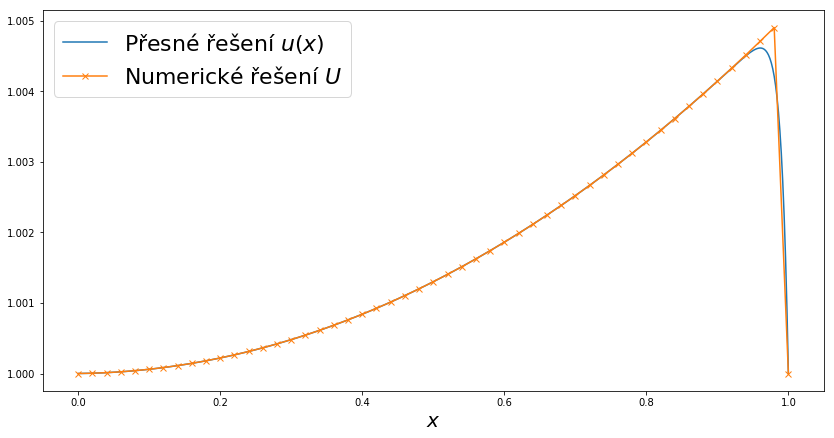

Solver Error dc: 1.3460343950555398e-12
E dc: 0.0006902099445069698
tau dc: 2.984000930870461
---------------------
 Krok sítě: h=0.01, tj. N =100


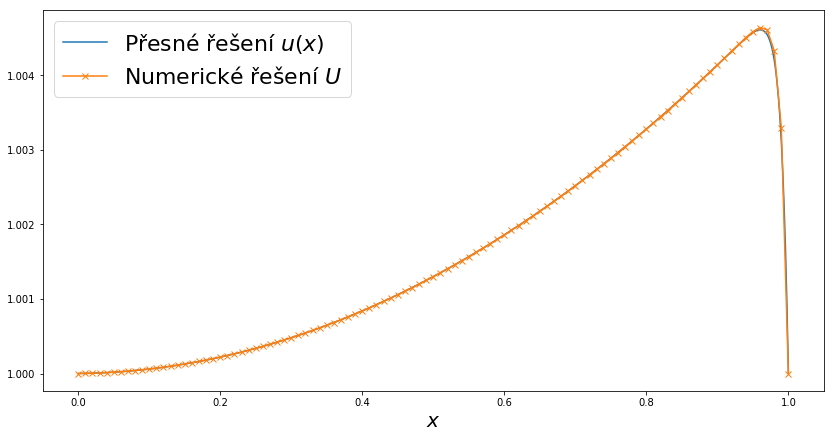

Solver Error dc: 5.2022830487885585e-12
E dc: 0.0001761851499746392
tau dc: 1.670553831889265
---------------------
 Krok sítě: h=0.002, tj. N =500


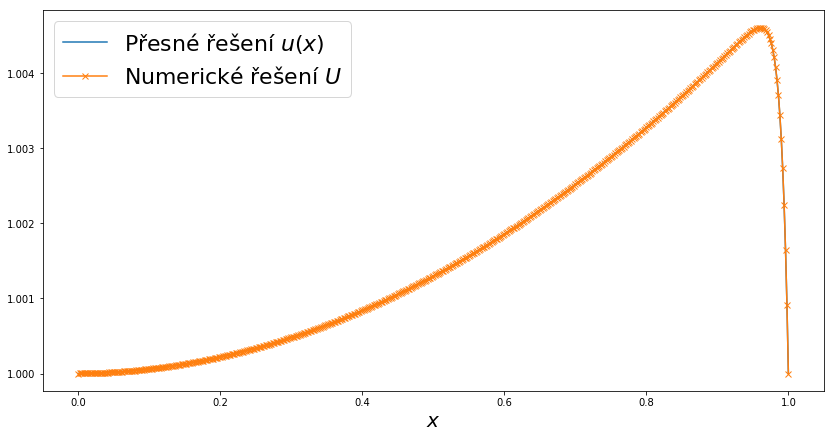

Solver Error dc: 1.399312332672764e-10
E dc: 6.281206325287059e-06
tau dc: 0.13955578379682265
---------------------
 Krok sítě: h=0.001, tj. N =1000


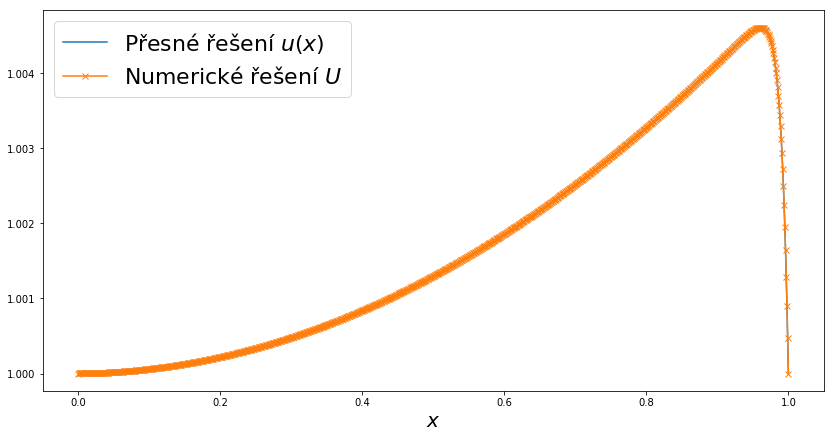

Solver Error dc: 6.277114383834714e-10
E dc: 1.5651830747032136e-06
tau dc: 0.03848123422358185
---------------------
 Krok sítě: h=0.0005, tj. N =2000


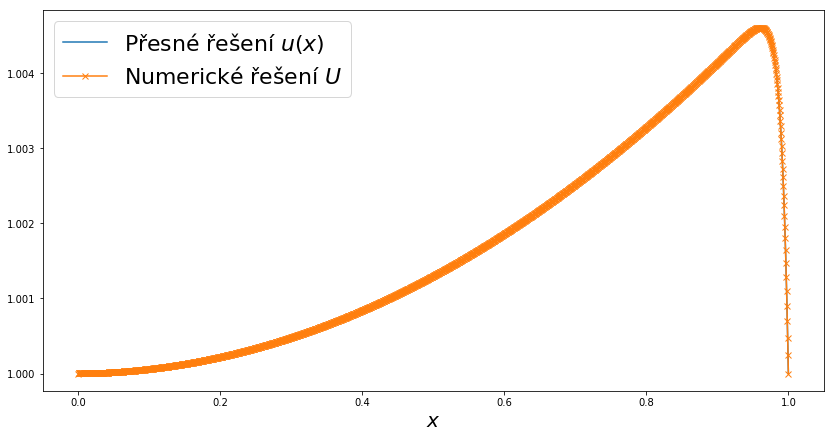

Solver Error dc: 1.9893050540176205e-09
E dc: 3.909731824958129e-07
tau dc: 0.010108496528118849


In [4]:
p = 1
q = 100
Ns = [10,20,30,50,100,500,1000,2000]
con_n_E = np.zeros(len(Ns))
con_n_tau = np.zeros(len(Ns))
to_table = np.zeros((len(Ns),3))

fdm_sym = FDM(p, q, 'x', 1, 1, 1000, 'dc')
fdm_sym.results()

i = 0
for N in Ns:
    fdm_dc = FDM(p, q, 'x', 1, 1, N, 'dc')
    fdm_dc.results()
    con_n_E[i] = fdm_dc.n_E
    con_n_tau[i] = fdm_dc.n_tau
    to_table[i]=np.array([np.around(N, decimals= -1),np.around(fdm_dc.h,decimals=3),np.around(fdm_dc.n_tau,decimals=3)])
    plt.plot(fdm_sym.x, fdm_sym.u, label = 'Přesné řešení $u(x)$') 
    plt.plot(fdm_dc.x, fdm_dc.U, 'x-', label = 'Numerické řešení $U$') 
    print(f'---------------------\n Krok sítě: h={np.around(fdm_dc.h,decimals=4)}, tj. N ={np.around(N)}')
    plt.xlabel('$x$',fontsize = 20)
    plt.legend(prop={'size': 22})
    plt.show()
    i += 1
    
    print(f'Solver Error dc: {fdm_dc.solver_error}')   
    print(f'E dc: {fdm_dc.n_E}') 
    print(f'tau dc: {fdm_dc.n_tau}') 
    
    del fdm_dc


### Konvergence schématu

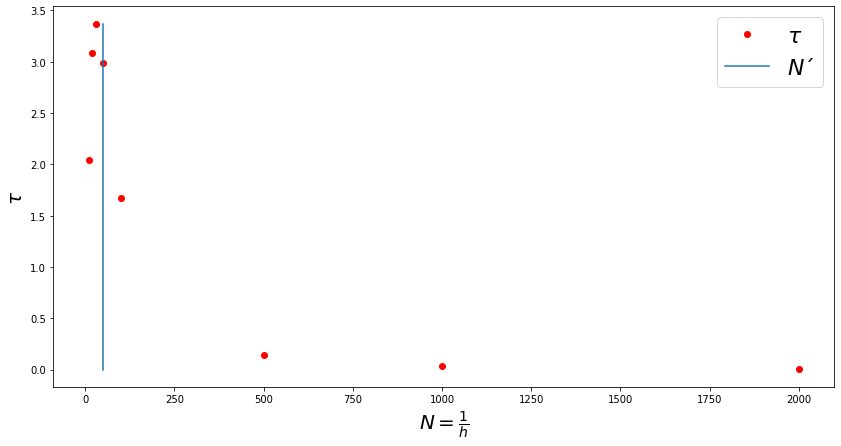

In [6]:
plt.plot(Ns, con_n_tau,'ro', label = '$\\tau$')
plt.plot([q/(2*p),q/(2*p)],[0,np.max(con_n_tau)], label = '$N´$')
plt.legend(prop={'size': 22})
plt.xlabel('$N=\\frac{1}{h}$',fontsize = 20)
plt.ylabel('$\\tau$',fontsize = 20)
plt.show()

### Schéma centrální diference

Úloha: 

$$-\,u''(x)+100\,u'(x)=x\mbox{, pro }x\in (0,1),$$
$$u(0)=u(1)=1.$$

Použitý solver bicgstab

---------------------
 Krok sítě: h=0.1, tj. N =10


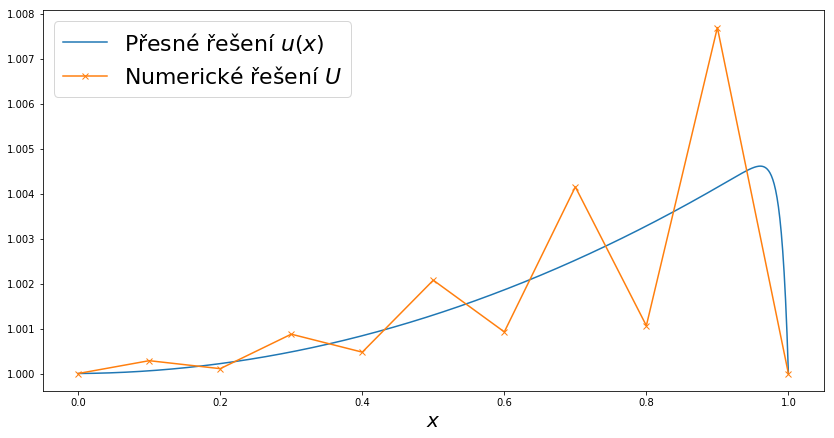

Solver Error dc: 0.00022586243385375182
E dc: 0.003551206116395811
tau dc: 2.040046301621146
---------------------
 Krok sítě: h=0.05, tj. N =20


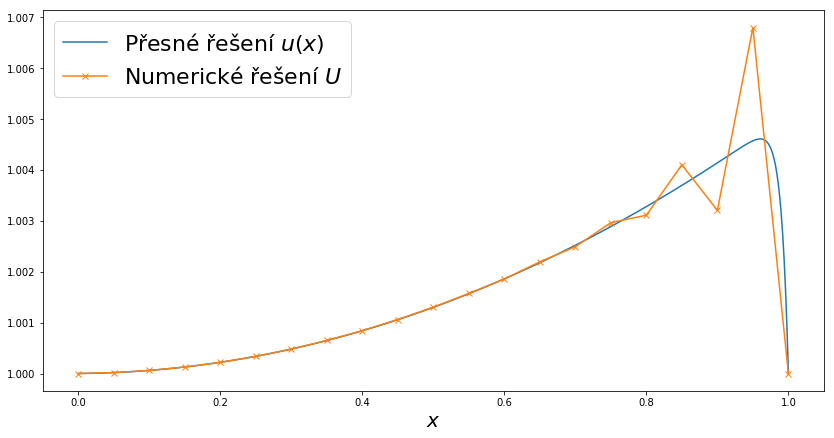

Solver Error dc: 0.002962997706640602
E dc: 0.002225513659092293
tau dc: 3.0871666682576233
---------------------
 Krok sítě: h=0.0333, tj. N =30


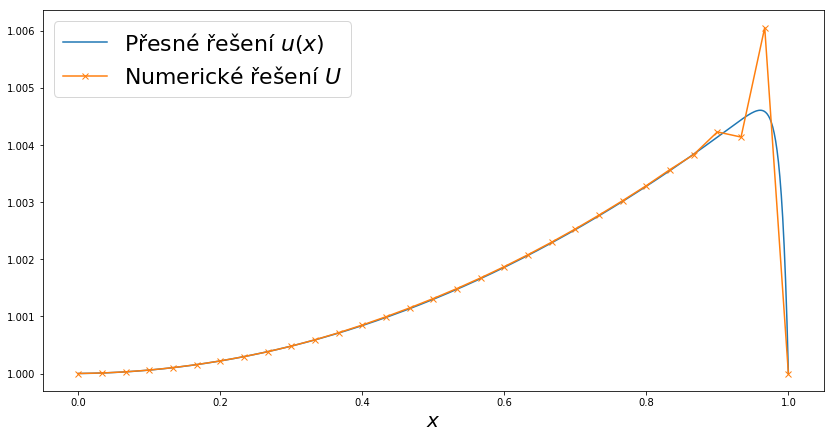

Solver Error dc: 0.010979954401568626
E dc: 0.0014715131559113193
tau dc: 3.371910221199869
---------------------
 Krok sítě: h=0.02, tj. N =50


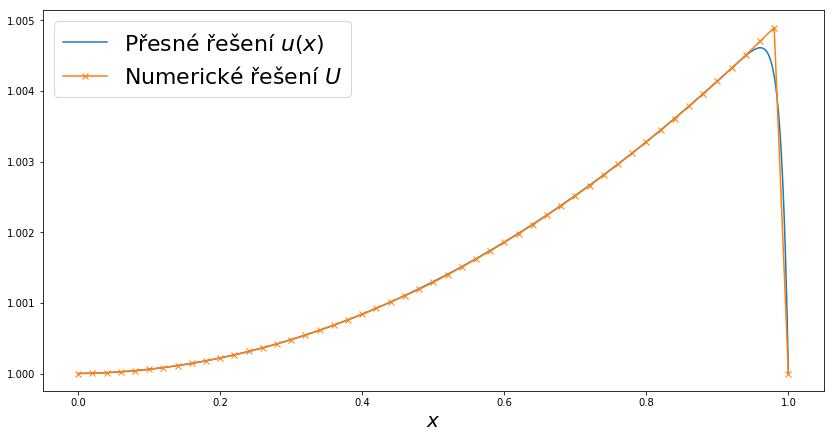

Solver Error dc: 0.026123588900627492
E dc: 0.0006860458052675433
tau dc: 2.984000930870461
---------------------
 Krok sítě: h=0.01, tj. N =100


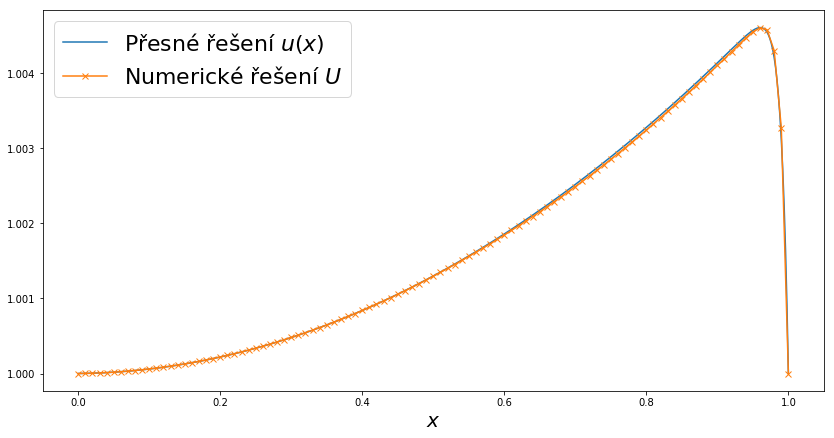

Solver Error dc: 0.017597293849248685
E dc: 0.00015343972795056615
tau dc: 1.670553831889265
---------------------
 Krok sítě: h=0.002, tj. N =500


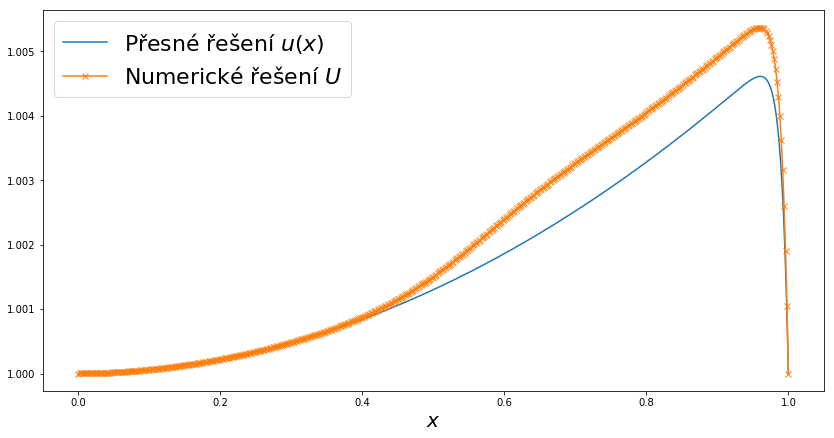

Solver Error dc: 0.353596440028632
E dc: 0.0007702794394726098
tau dc: 0.13955578379682265
---------------------
 Krok sítě: h=0.001, tj. N =1000


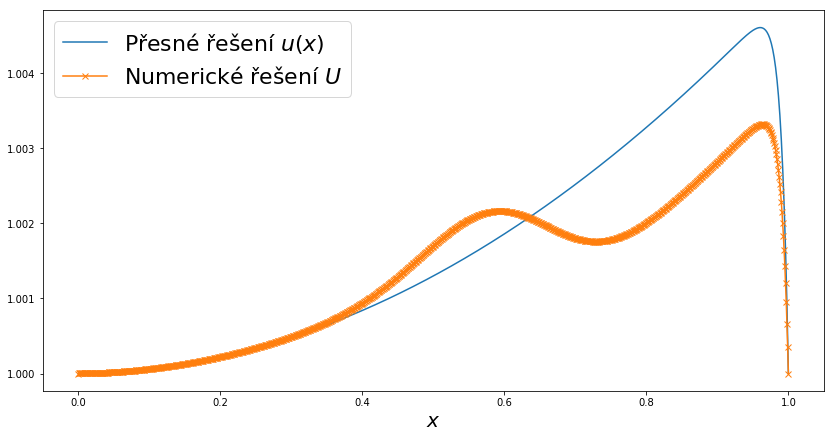

Solver Error dc: 1.158361652332358
E dc: 0.001319506918300295
tau dc: 0.03848123422358185
---------------------
 Krok sítě: h=0.0005, tj. N =2000


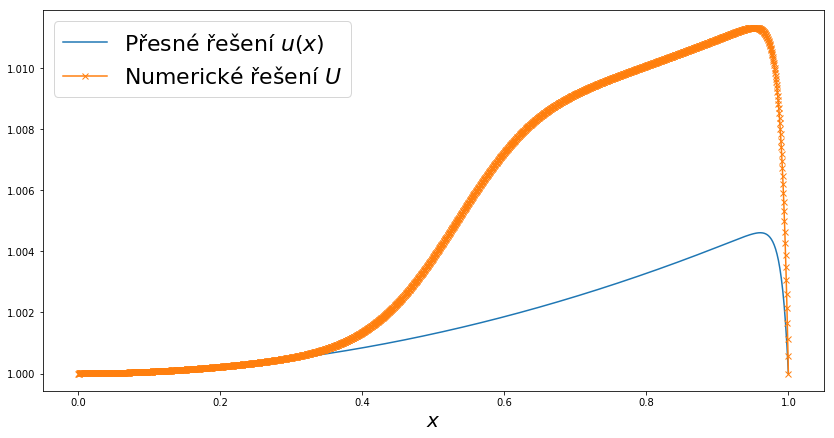

Solver Error dc: 3.536236706685275
E dc: 0.006804317560811679
tau dc: 0.010108496528118849


In [5]:
p = 1
q = 100
Ns = [10,20,30,50,100,500,1000,2000]
con_n_E = np.zeros(len(Ns))
con_n_tau = np.zeros(len(Ns))
to_table = np.zeros((len(Ns),3))

fdm_sym = FDM(p, q, 'x', 1, 1, 1000, 'dc')
fdm_sym.results()

i = 0
for N in Ns:
    fdm_dc = FDM(p, q, 'x', 1, 1, N, 'dc', solver='bicgstab')
    fdm_dc.results()
    con_n_E[i] = fdm_dc.n_E
    con_n_tau[i] = fdm_dc.n_tau
    to_table[i]=np.array([np.around(N, decimals= -1),np.around(fdm_dc.h,decimals=3),np.around(fdm_dc.n_tau,decimals=3)])
    plt.plot(fdm_sym.x, fdm_sym.u, label = 'Přesné řešení $u(x)$') 
    plt.plot(fdm_dc.x, fdm_dc.U, 'x-', label = 'Numerické řešení $U$') 
    print(f'---------------------\n Krok sítě: h={np.around(fdm_dc.h,decimals=4)}, tj. N ={np.around(N)}')
    plt.xlabel('$x$',fontsize = 20)
    plt.legend(prop={'size': 22})
    plt.show()
    i += 1
    print(f'Solver Error dc: {fdm_dc.solver_error}')   
    print(f'E dc: {fdm_dc.n_E}') 
    print(f'tau dc: {fdm_dc.n_tau}') 
    
    del fdm_dc



In [8]:
pd.DataFrame(to_table, columns=["N", "h","$\\tau$"])

,N,h,$\tau$
0,10.0,0.100,2.040
1,20.0,0.050,3.087
2,30.0,0.033,3.372
3,50.0,0.020,2.984
4,100.0,0.010,1.671
5,500.0,0.002,0.140
6,1000.0,0.001,0.038
7,2000.0,0.000,0.010


### Porovnání schémat

1. centrální diference
2. pravá diference
3. levá diference
4. diference 4. řádu

Úloha: 

$$-\,u''(x)+100\,u'(x)=x\mbox{, pro }x\in (0,1),$$
$$u(0)=u(1)=1.$$


---------------------
 Krok sítě: h=0.1, tj. N =10


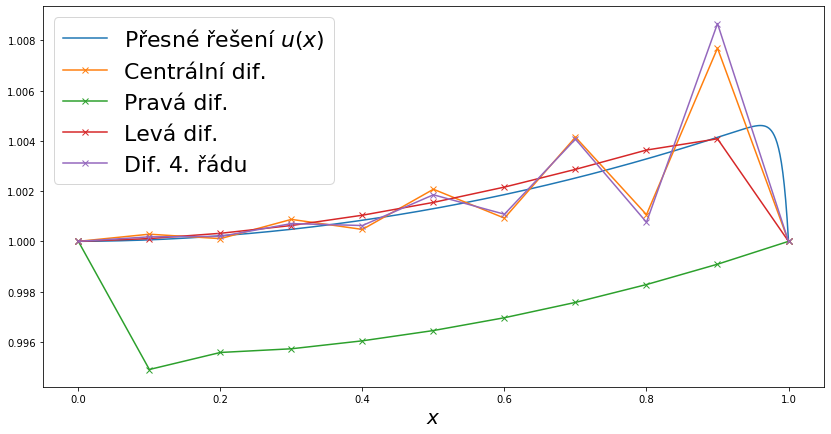

---------------------
 Krok sítě: h=0.0333, tj. N =30


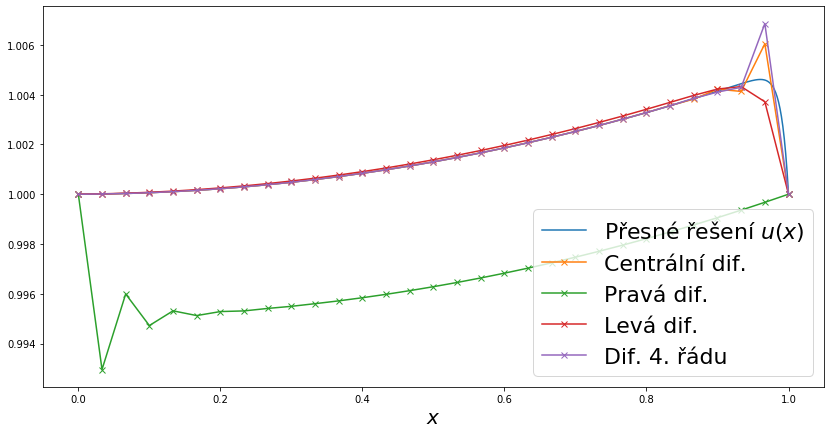

C:\Users\ASvan\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:193: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)


---------------------
 Krok sítě: h=0.02, tj. N =50


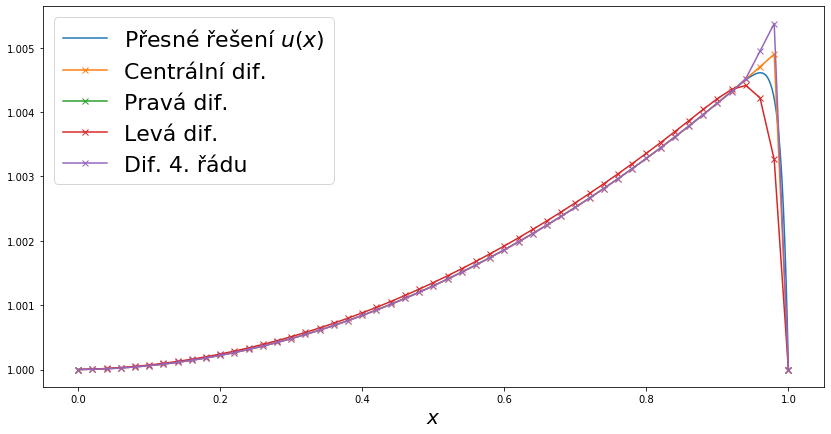

---------------------
 Krok sítě: h=0.01, tj. N =100


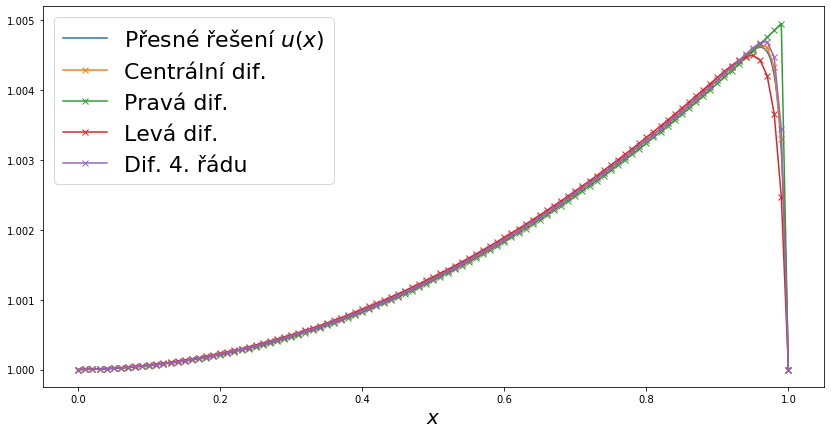

---------------------
 Krok sítě: h=0.005, tj. N =200


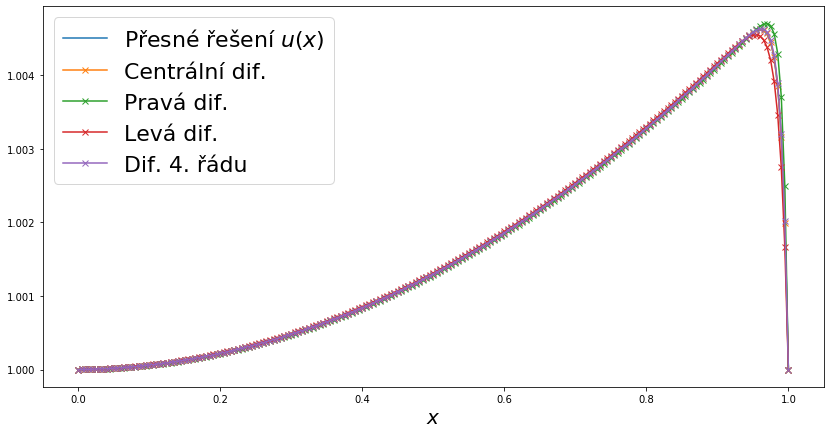

---------------------
 Krok sítě: h=0.002, tj. N =500


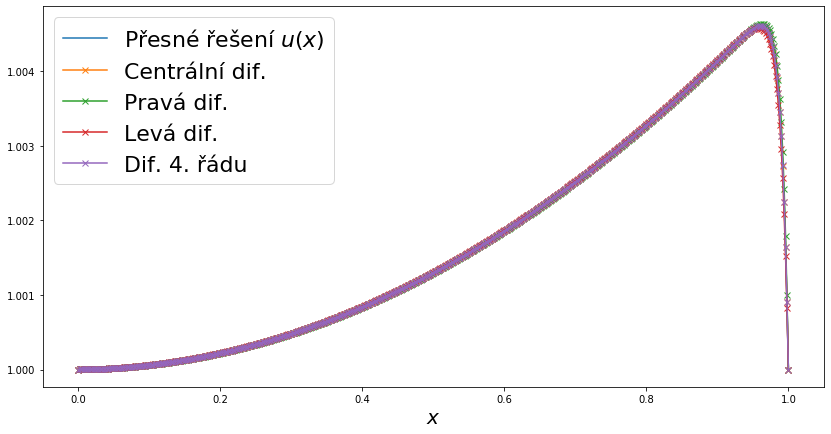

---------------------
 Krok sítě: h=0.001, tj. N =1000


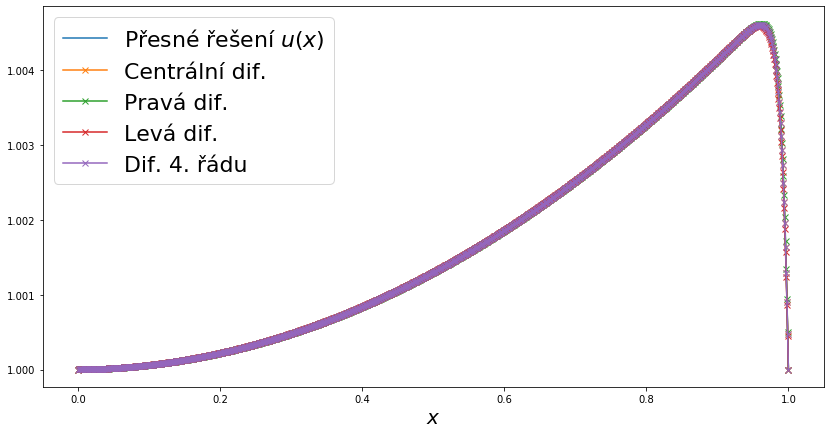

---------------------
 Krok sítě: h=0.0007, tj. N =1500


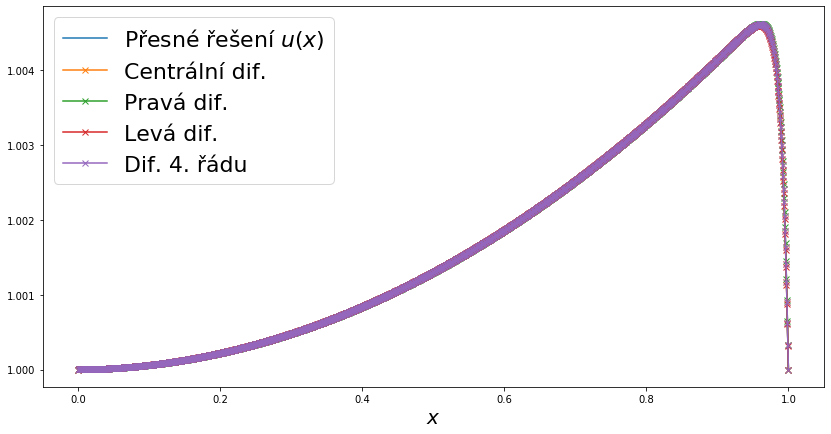

---------------------
 Krok sítě: h=0.0005, tj. N =2000


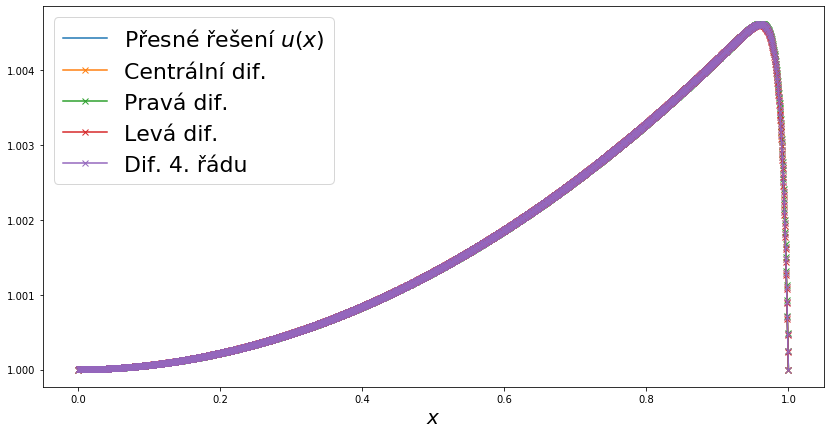

,$N$,$h$,$\tau\;(L_{dc})$,$E\;(L_{dc})$,$\tau\;(L_{dp})$,$E\;(L_{dp})$,$\tau\;(L_{dl})$,$E\;(L_{dl})$,$\tau\;(L_{4o})$,$E\;(L_{4o})$
0,10.0,0.1000,2.040046,3.550236e-03,4.539815,0.005161,0.459722,0.000354,2.082539,4.528135e-03
1,30.0,0.0333,3.371910,1.456937e-03,10.469167,0.007053,3.725347,0.000872,3.702681,2.269343e-03
2,50.0,0.0200,2.984001,6.902099e-04,12.506476,NaN,6.538474,0.000945,3.577910,1.165210e-03
3,100.0,0.0100,1.670554,1.761851e-04,11.854752,0.001827,8.513644,0.000649,2.349114,3.237764e-04
4,200.0,0.0050,0.655252,4.018515e-05,8.548476,0.000583,7.237973,0.000377,1.062719,8.113214e-05
5,500.0,0.0020,0.139556,6.281206e-06,4.328020,0.000198,4.048908,0.000168,0.254272,1.263978e-05
6,1000.0,0.0010,0.038481,1.565183e-06,2.347240,0.000095,2.270278,0.000087,0.073335,3.136680e-06
7,1500.0,0.0007,0.017676,6.952201e-07,1.608294,0.000062,1.572942,0.000059,0.034219,1.391785e-06
8,2000.0,0.0005,0.010108,3.909732e-07,1.222929,0.000046,1.202712,0.000044,0.019726,7.823966e-07


,centrální,pravá,levá,čtvrtého řádu
$N$,50.0,100.0,$\forall$,$\nexists$


Wall time: 2min 23s


In [9]:
%%time
p = 1
q = 100
fce = 'x'
alfa = 1
beta = 1
dec = 50 #zaokrouhlení
Ns = [10,30,50,100,200,500,1000,1500,2000]

to_table = np.zeros((len(Ns),10))

fdm_sym = FDM(p, q, 'x', 1, 1, 1000, 'dc')
fdm_sym.results()

i = 0
for N in Ns:
    fdm_dc = FDM(p, q, fce, alfa, beta, N, 'dc')
    fdm_dc.results()
    fdm_dr = FDM(p, q, fce, alfa, beta, N, 'dr')
    fdm_dr.results()
    fdm_dl = FDM(p, q, fce, alfa, beta, N, 'dl')
    fdm_dl.results()
    fdm_4o = FDM(p, q, fce, alfa, beta, N, '4o')
    fdm_4o.results()
    to_table[i]=np.array([np.around(int(N)),np.around(fdm_dc.h,decimals=4),
                          np.around(fdm_dc.n_tau,decimals=dec),np.around(fdm_dc.n_E,decimals=dec),
                          np.around(fdm_dr.n_tau,decimals=dec),np.around(fdm_dr.n_E,decimals=dec),
                          np.around(fdm_dl.n_tau,decimals=dec),np.around(fdm_dl.n_E,decimals=dec),
                          np.around(fdm_4o.n_tau,decimals=dec),np.around(fdm_4o.n_E,decimals=dec)])

    plt.plot(fdm_sym.x, fdm_sym.u, label = 'Přesné řešení $u(x)$') 
    plt.plot(fdm_dc.x, fdm_dc.U, 'x-', label = 'Centrální dif.')  
    plt.plot(fdm_dr.x,fdm_dr.U, 'x-', label = 'Pravá dif.')
    plt.plot(fdm_dl.x,fdm_dl.U, 'x-', label = 'Levá dif.')
    plt.plot(fdm_4o.x,fdm_4o.U, 'x-', label = 'Dif. 4. řádu')
    print(f'---------------------\n Krok sítě: h={np.around(fdm_dc.h,decimals=4)}, tj. N ={np.around(N)}')
    plt.legend(prop={'size': 22})
    plt.xlabel('$x$',fontsize = 20)
    plt.show()
    i += 1
    
    del fdm_dc, fdm_dr, fdm_dl, fdm_4o

    
t1=pd.DataFrame(to_table, columns=["$N$", "$h$","$\\tau\;(L_{dc})$ ","$E\;(L_{dc})$",
                                "$\\tau\;(L_{dp})$ ","$E\;(L_{dp})$","$\\tau\;(L_{dl})$","$E\;(L_{dl})$",
                                "$\\tau\;(L_{4o})$","$E\;(L_{4o})$"])
display(t1)
t2=pd.DataFrame(np.reshape(np.array([q/(2*p),q/p,'$\\forall$','$\\nexists$']),(1,4)),
             columns=["centrální","pravá","levá","čtvrtého řádu"],index=["$N$"])
display(t2)

### Schéma centrální diference 

Úloha: 

$$-0.000001\,u''(x)+\,u'(x)=x\mbox{, pro }x\in (0,1),$$
$$u(0)=u(1)=0.$$


Centrální diference, N = 500000


C:\Users\ASvan\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


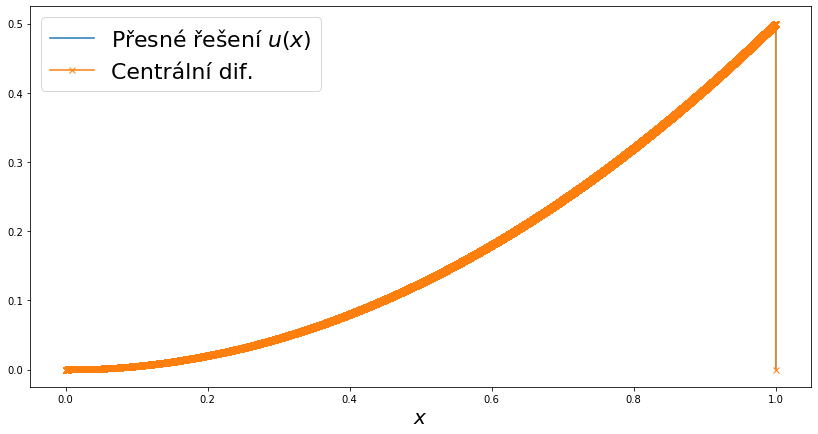

Centrální diference, N = 100


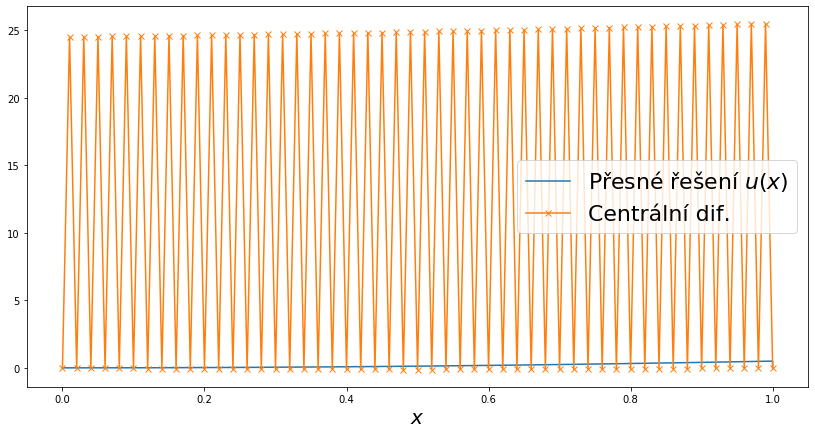

In [10]:
p = 0.000001

nn = int(1/(2*p))
print(f'Centrální diference, N = {nn}')
fdm_dc5k = FDM(p, 1, 'x', 0, 0, nn, 'dc')
fdm_dc5k.results()
plt.plot(fdm_dc5k.x, fdm_dc5k.u, label='Přesné řešení $u(x)$')
plt.plot(fdm_dc5k.x, fdm_dc5k.U, 'x-', label='Centrální dif.') 
plt.xlabel('$x$',fontsize = 20)
plt.legend(prop={'size': 22})
plt.show()


fdm_dc = FDM(p, 1, 'x', 0, 0,100, 'dc')
fdm_dc.results()
print('Centrální diference, N = 100')
plt.plot(fdm_dc5k.x, fdm_dc5k.u, label='Přesné řešení $u(x)$')
plt.plot(fdm_dc.x, fdm_dc.U, 'x-', label='Centrální dif.') 
plt.xlabel('$x$',fontsize = 20)
plt.legend(prop={'size': 22})
plt.show()





### Schéma levé diference 

Úloha: 

$$-0.000001\,u''(x)+\,u'(x)=x\mbox{, pro }x\in (0,1),$$
$$u(0)=u(1)=0.$$

Levá diference



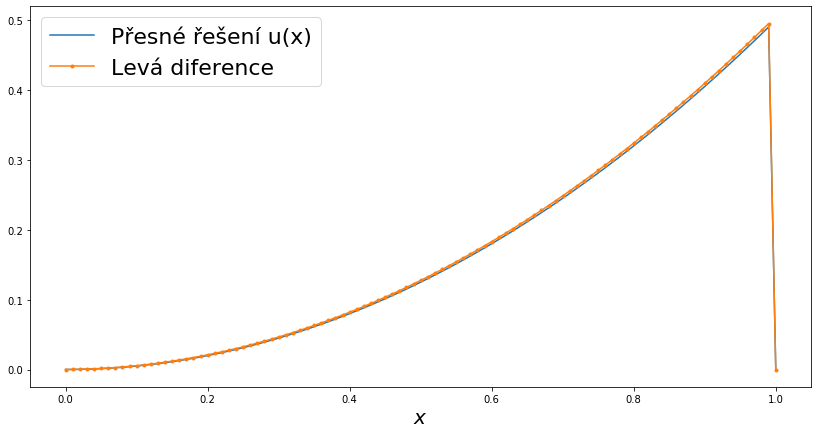

In [11]:
fdm_dl = FDM(0.000001, 1, 'x', 0, 0, 100, 'dl')
fdm_dl.results()
plt.plot(fdm_dl.x, fdm_dl.u, label='Přesné řešení u(x)') 
plt.plot(fdm_dl.x, fdm_dl.U, '.-', label='Levá diference') 
print('Levá diference\n')
plt.xlabel('$x$',fontsize = 20)
plt.legend(prop={'size': 22})
plt.show()

## Upwind schématu centrální diference vychýlením perturbačního parametru $p$

Úloha: 

$$-0.000001\,u''(x)+\,u'(x)=x\mbox{, pro }x\in (0,1),$$
$$u(0)=u(1)=0.$$


Upwind centrální diference



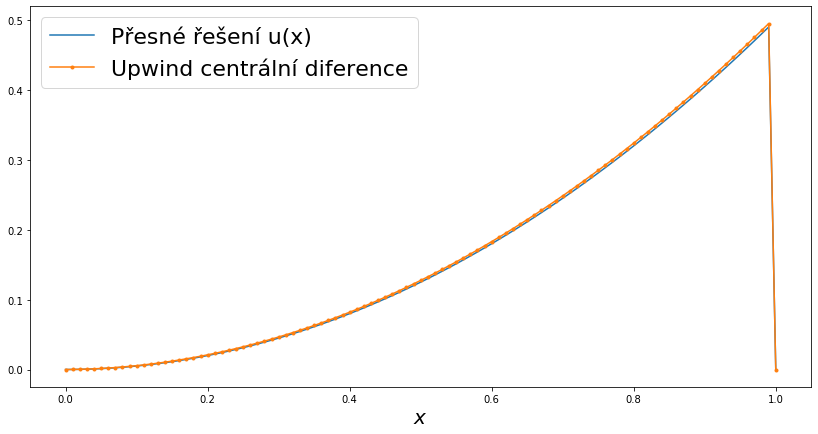

Hranice stability: 99.98000399920015


In [12]:
#del fdm_3
p = 0.000001
q = 1
N = 100
fdm_3 = FDM(p + (q/(2*N)), 1, 'x', 0, 0, N, 'dc')
fdm_3.results()
plt.plot(fdm_dl.x, fdm_dl.u, label='Přesné řešení u(x)') # řešení u(x) z předchozího celu, aby bylo bez upwindu
plt.plot(fdm_3.x, fdm_3.U, '.-', label='Upwind centrální diference' ) 
print('Upwind centrální diference\n')
plt.xlabel('$x$',fontsize = 20)
plt.legend(prop={'size': 22})
plt.show()
#stabilita
print(f'Hranice stability: {(1/(2*(p + (q/(2*N)))))}')


### Porovnání chyb pro úlohu s různými perturbačnimi parametry $p$

Úloha: 

$$-p\,u''(x)+\,u'(x)=x\mbox{, pro }x\in (0,1), \; p \in \{10^{-2},\,10^{-4},\,10^{-6} \},$$
$$u(0)=u(1)=0.$$

p = 0.01


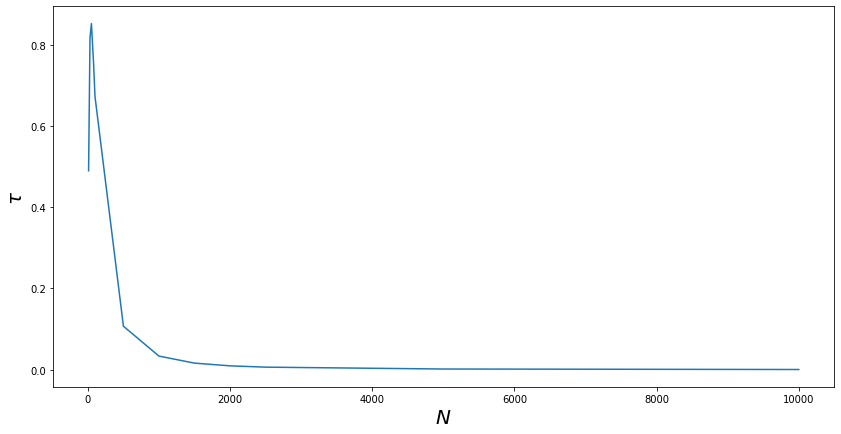

p = 0.0001


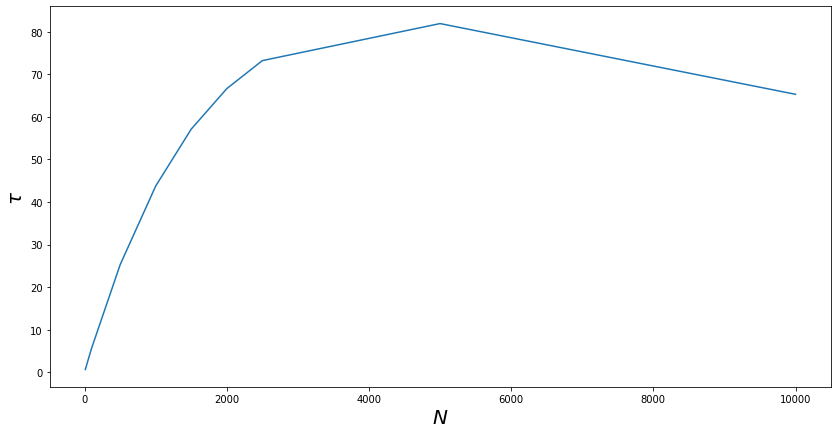

p = 0.000001


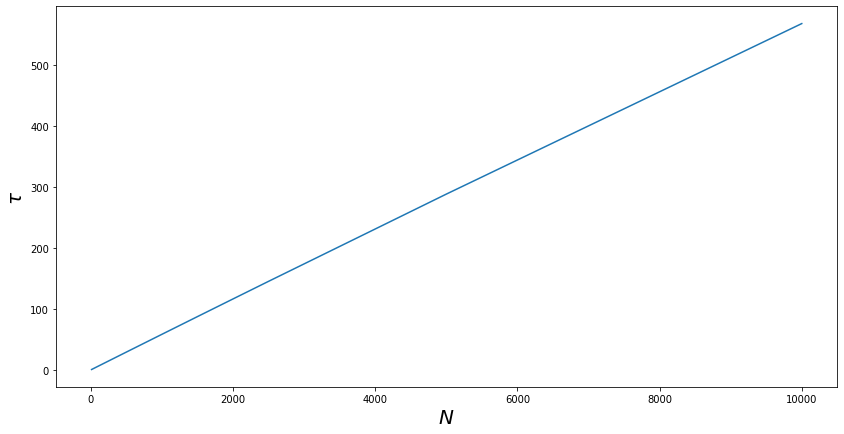

,N,h,$\tau$,$E$,N',$\tau$,$E$,N',$\tau$,$E$,N'
0,10.0,0.1000,0.4895,0.0549,8.3333,0.6418,0.0742,9.9800,0.6436,0.0744,9.9998
1,30.0,0.0333,0.8168,0.0294,18.7500,1.7978,0.0692,29.8211,1.8136,0.0699,29.9982
2,50.0,0.0200,0.8517,0.0180,25.0000,2.9400,0.0679,49.5050,2.9836,0.0690,49.9950
3,80.0,0.0125,0.7550,0.0098,30.7692,4.6275,0.0667,78.7402,4.7382,0.0685,79.9872
4,100.0,0.0100,0.6724,0.0070,33.3333,5.7357,0.0661,98.0392,5.9077,0.0683,99.9800
5,500.0,0.0020,0.1069,0.0005,45.4545,25.2773,0.0575,454.5455,29.2693,0.0677,499.5005
6,1000.0,0.0010,0.0334,0.0001,47.6190,43.7571,0.0490,833.3333,58.3922,0.0675,998.0040
7,1500.0,0.0007,0.0161,0.0001,48.3871,57.1308,0.0422,1153.8462,87.4273,0.0674,1495.5135
8,2000.0,0.0005,0.0094,0.0000,48.7805,66.6389,0.0365,1428.5714,116.3749,0.0672,1992.0319
9,2500.0,0.0004,0.0062,0.0000,49.0196,73.2206,0.0318,1666.6667,145.2353,0.0671,2487.5622


In [13]:
q = 1
Ns = [10,30,50,80,100,500,1000,1500,2000,2500,5000,10000]
to_table = np.zeros((len(Ns),11))

i = 0
for N in Ns:
    fdm_2 = FDM(0.01 + (q/(2*N)), q, 'x', 0, 0, N, 'dc')
    fdm_2.results()
    fdm_4 = FDM(0.0001 + (q/(2*N)), q, 'x', 0, 0, N, 'dc')
    fdm_4.results()
    fdm_6 = FDM(0.000001 + (q/(2*N)), q, 'x', 0, 0, N, 'dc')
    fdm_6.results()
    to_table[i]=np.array([N,np.around(fdm_2.h,decimals=4),np.around(fdm_2.n_tau,decimals=4),np.around(fdm_2.n_E,decimals=4),np.around(1/(2*(0.01 + (q/(2*N)))),decimals=4),
                          np.around(fdm_4.n_tau,decimals=4),np.around(fdm_4.n_E,decimals=4),np.around(1/(2*(0.0001 + (q/(2*N)))),decimals=4),
                          np.around(fdm_6.n_tau,decimals=4),np.around(fdm_6.n_E,decimals=4),np.around(1/(2*(0.000001 + (q/(2*N)))),decimals=4)])
    i = i + 1
    del fdm_2, fdm_4, fdm_6

    
plt.plot(Ns, to_table[:,2])
print(f'p = 0.01')
plt.xlabel(f'$N$',fontsize = 20)
plt.ylabel('$\\tau$',fontsize = 20)
plt.show()
plt.plot(Ns, to_table[:,5])
print(f'p = 0.0001')
plt.xlabel('$N$',fontsize = 20)
plt.ylabel('$\\tau$',fontsize = 20)
plt.show()
plt.plot(Ns, to_table[:,8])
print(f'p = 0.000001')
plt.xlabel('$N$',fontsize = 20)
plt.ylabel('$\\tau$',fontsize = 20)
plt.show()
pd.DataFrame(to_table, columns=["N", "h","$\\tau$","$E$","N'","$\\tau$","$E$","N'","$\\tau$","$E$","N'"])

### Iljin–Allen–Southwell schéma (IAS)

Úloha: 

$$-10^{-6}\,u''(x)+\,u'(x)=x\mbox{, pro }x\in (0,1),$$
$$u(0)=u(1)=0.$$



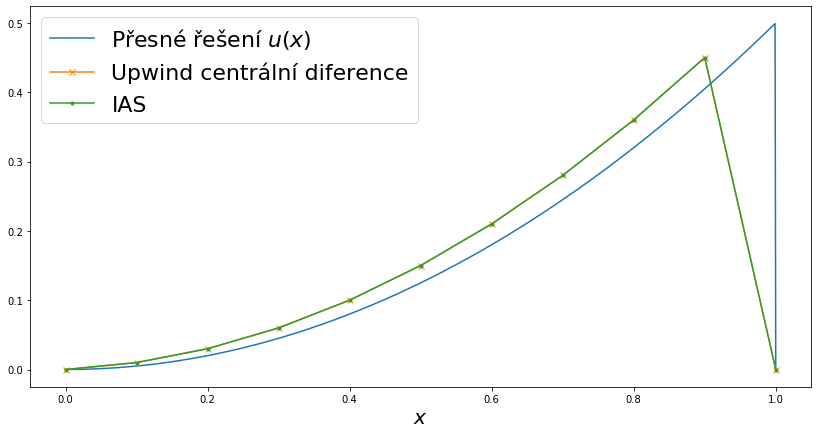

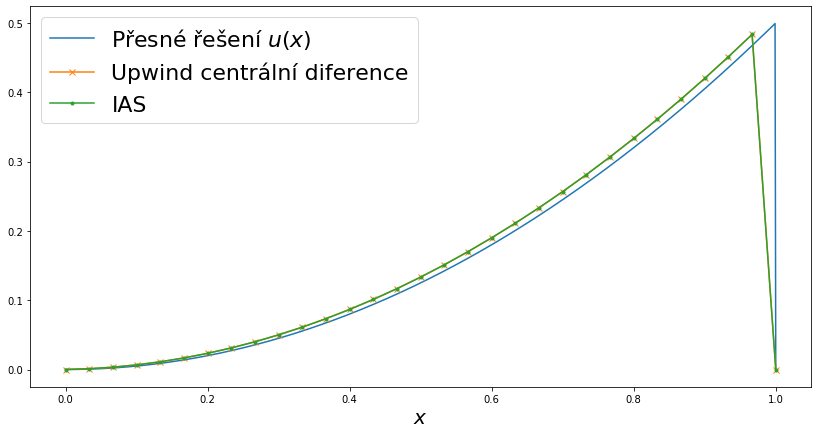

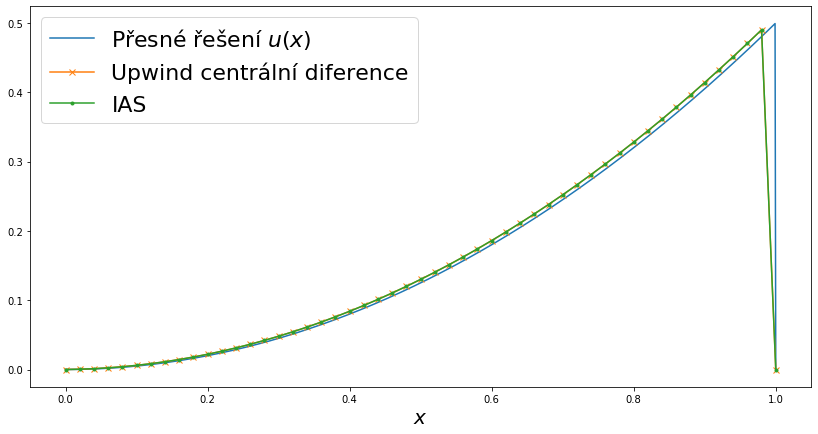

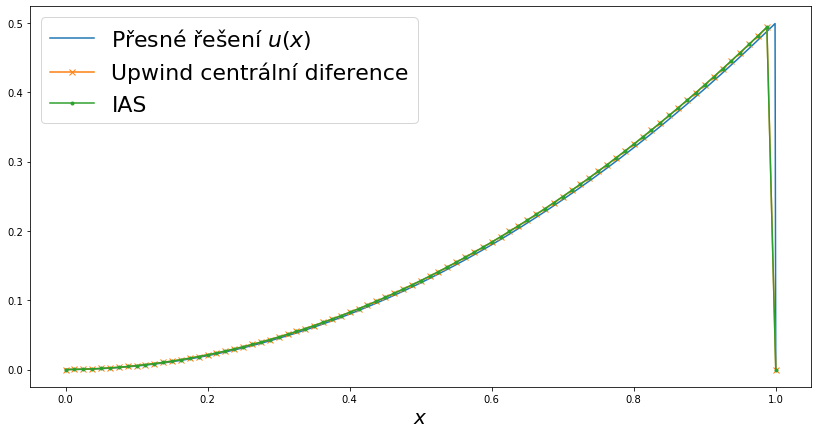

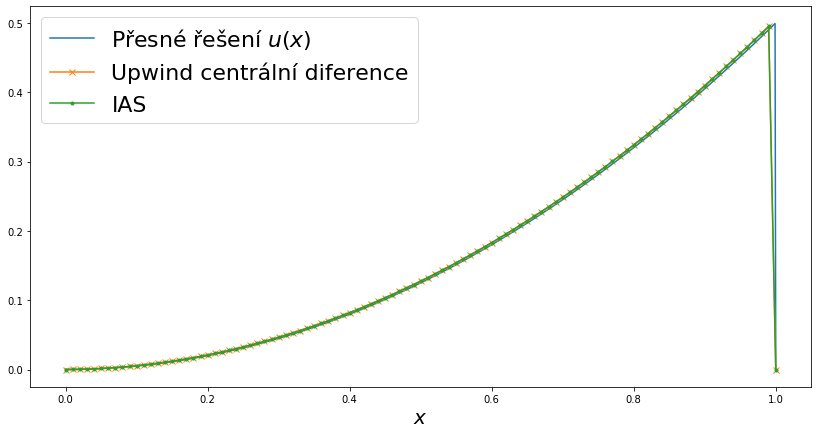

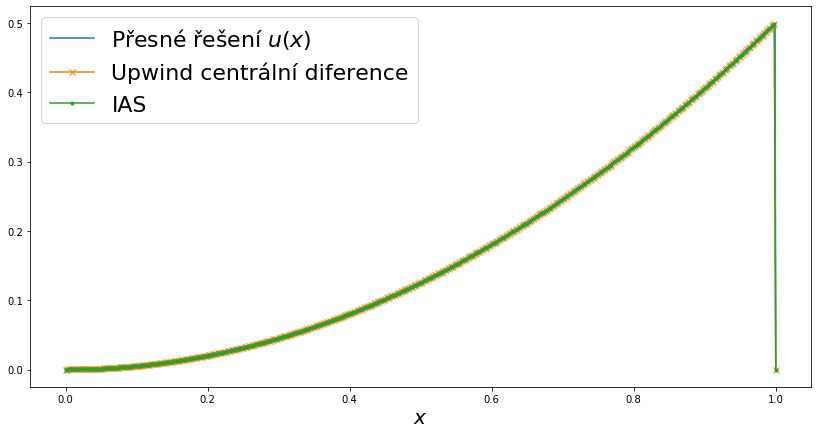

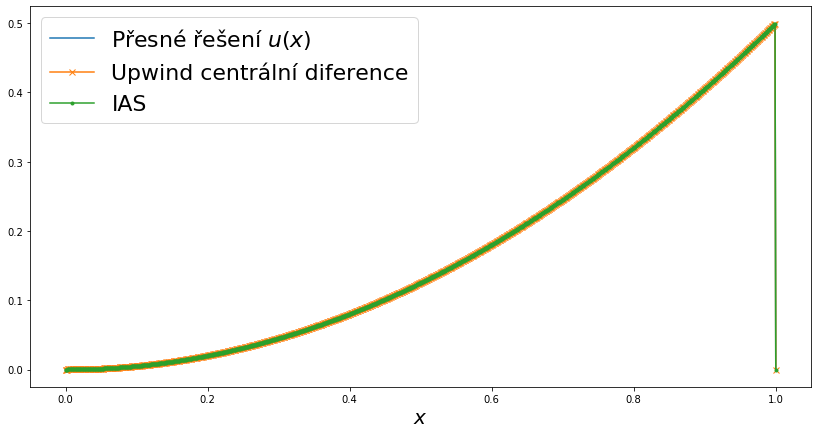

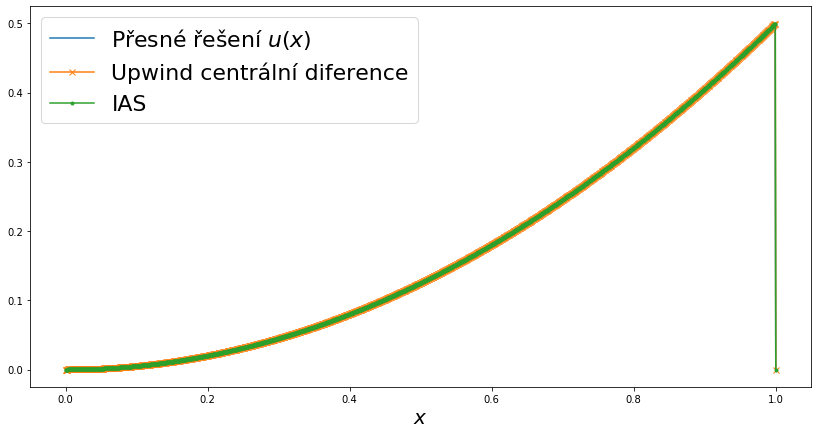

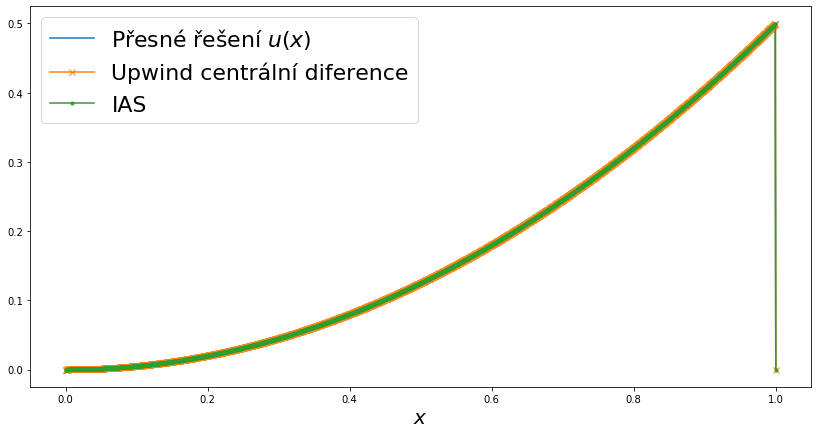

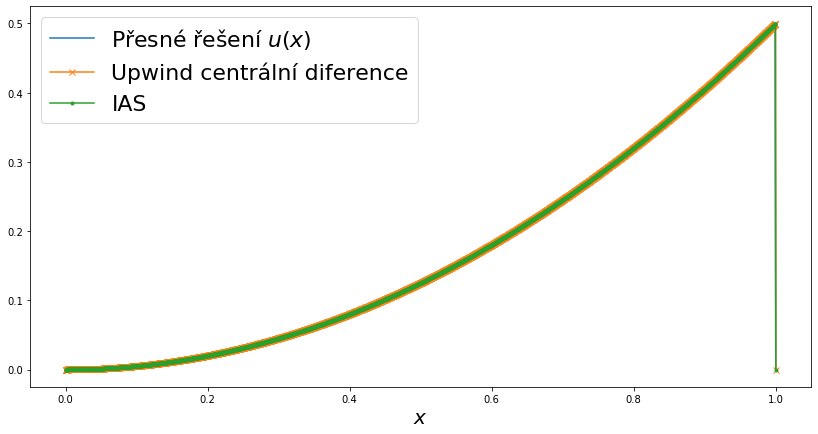

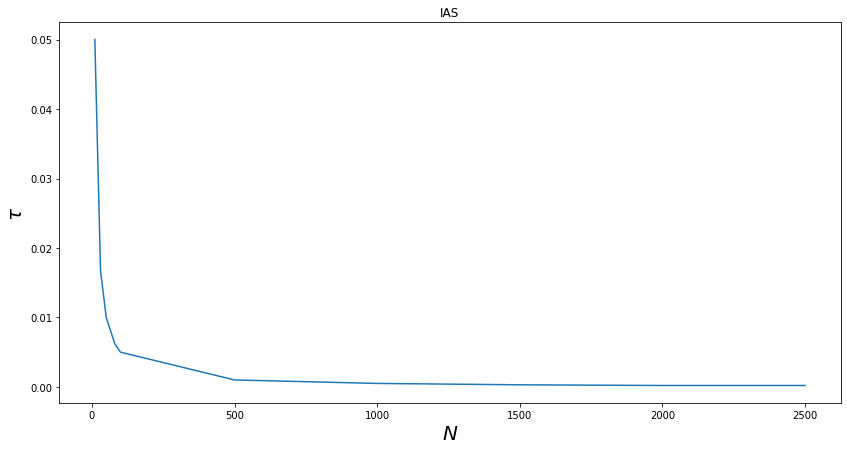

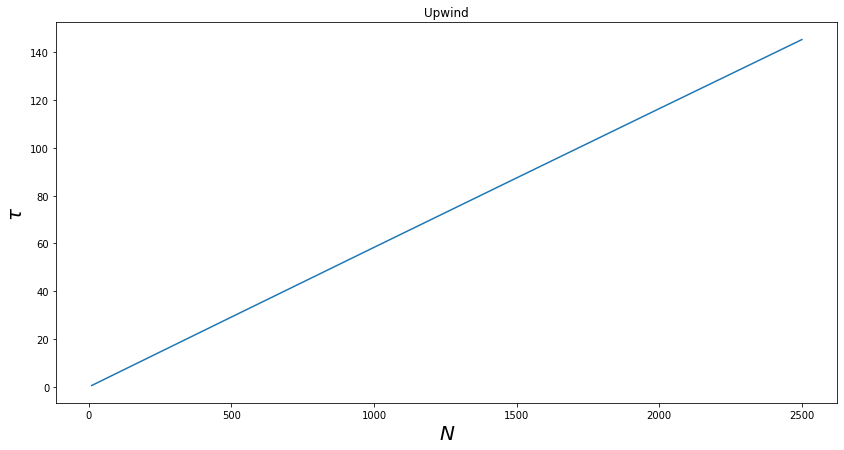

,N,h,$\tau$(IAS),$E$(IAS),$\tau$(uw),$E$(uw),$\tau$(dl),$E$(dl),$\tau$(dc),$E$(dc)
0,10.0,0.1000,0.0500,0.0450,0.6436,0.0744,0.0500,0.0450,2.5000,2499.9550
1,30.0,0.0333,0.0167,0.0161,1.8136,0.0699,0.0167,0.0161,7.4996,277.7619
2,50.0,0.0200,0.0100,0.0098,2.9836,0.0690,0.0100,0.0098,12.4988,99.9910
3,80.0,0.0125,0.0062,0.0062,4.7382,0.0685,0.0063,0.0061,19.9968,39.0584
4,100.0,0.0100,0.0050,0.0049,5.9077,0.0683,0.0050,0.0049,24.9950,24.9983
5,500.0,0.0020,0.0010,0.0010,29.2693,0.0677,0.1240,0.0010,124.8752,1.0804
6,1000.0,0.0010,0.0005,0.0005,58.3922,0.0675,0.4995,0.0005,249.5005,0.5166
7,1500.0,0.0007,0.0003,0.0003,87.4273,0.0674,1.1247,0.0004,373.8757,0.4971
8,2000.0,0.0005,0.0002,0.0002,116.3749,0.0672,1.9998,0.0007,498.0010,0.4960
9,2500.0,0.0004,0.0002,0.0002,145.2353,0.0671,3.1248,0.0010,621.8762,0.4950


In [14]:
p = 0.000001
q = 1
Ns = [10,30,50,80,100,500,1000,1500,2000,2500] #pouze sudý počet!!!
to_table = np.zeros((len(Ns),10))

fdm_sym = FDM(p, q, 'x', 0, 0, 1000, 'dc')
fdm_sym.results()

i = 0
for N in Ns:
    fdm_ias = FDM(p, q, 'x', 0, 0, N, 'ias')
    fdm_ias.results()
    fdm_uw = FDM(p + (q/(2*N)), q, 'x', 0, 0, N, 'dc')
    fdm_uw.results()
    fdm_dl = FDM(p, q, 'x', 0, 0, N, 'dl')
    fdm_dl.results()
    fdm_dc = FDM(p, q, 'x', 0, 0, N, 'dc')
    fdm_dc.results()
    
    to_table[i]=np.array([np.around(N, decimals= -1),np.around(fdm_ias.h,decimals=4),
                          np.around(fdm_ias.n_tau,decimals=4),np.around(fdm_ias.n_E,decimals=4),
                          np.around(fdm_uw.n_tau,decimals=4),np.around(fdm_uw.n_E,decimals=4),
                          np.around(fdm_dl.n_tau,decimals=4),np.around(fdm_dl.n_E,decimals=4),
                          np.around(fdm_dc.n_tau,decimals=4),np.around(fdm_dc.n_E,decimals=4)])

    plt.plot(fdm_sym.x, fdm_sym.u, label = 'Přesné řešení $u(x)$')
    plt.plot(fdm_uw.x, fdm_uw.U, 'x-', label = 'Upwind centrální diference')
    plt.plot(fdm_ias.x, fdm_ias.U, '.-', label = 'IAS')
    plt.legend(prop={'size': 22})  
    plt.xlabel('$x$',fontsize = 20)
    #plt.ylabel('$U(x)$',fontsize = 20)
    plt.show()
    i += 1
    del fdm_ias, fdm_uw, fdm_dc, fdm_dl
    
#plt.show()
plt.plot(Ns, to_table[:,2])
plt.title(f'IAS')
plt.xlabel('$N$',fontsize = 20)
plt.ylabel('$\\tau$',fontsize = 20)
plt.show()

plt.plot(Ns, to_table[:,4])
plt.title(f'Upwind')
plt.xlabel('$N$',fontsize = 20)
plt.ylabel('$\\tau$',fontsize = 20)
plt.show()

pd.DataFrame(to_table, columns=["N", "h","$\\tau$(IAS)","$E$(IAS)","$\\tau$(uw)","$E$(uw)","$\\tau$(dl)","$E$(dl)","$\\tau$(dc)","$E$(dc)"])